
# Linear Regression Project

Analyzing a dataset of a **Ecommerce platform**. The Objective of this project is to build a model via **Supervised Learning** capable of predicting the **Expected Yearly Expenditure** of customers based on their **Presence and Non-Purchase Past behaviors** on the platform. 

We'll be conducting an **Exploratory Data Analysis** to understand the impact of each variable. And finally picking and building the most suitable model [**Linear Regression** for this project] for the use-case.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customers' info such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

In [2]:
Ecom = pd.read_csv('Ecommerce Customers')

**Checking the data for understanding and irregularities if any**

In [3]:
Ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
Ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
Ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

___
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns to check if the correlation make sense?**

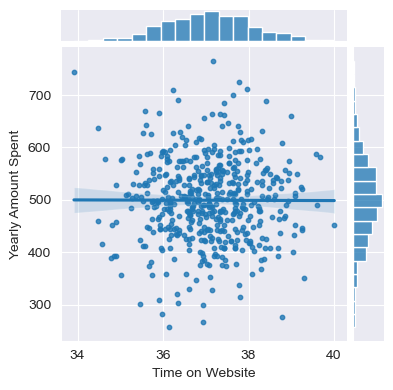

In [6]:
sns.set_style('darkgrid')
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = Ecom, kind = 'reg', height = 4, ratio = 8, marker = 'o', scatter_kws = {'s': 10}, marginal_kws = {'kde': False})
plt.show()

**We can see there's not much correlation between the two examined variables. However, we haven't quantified it yet so we'll look at it later**

**Now for the Time on App**

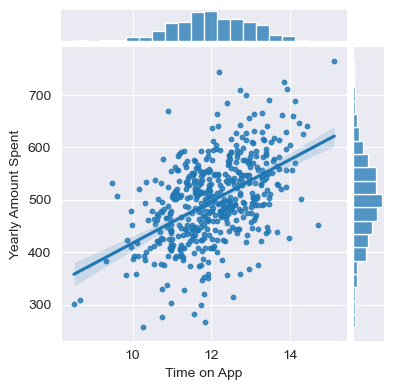

In [153]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = Ecom, kind = 'reg', height = 4, ratio = 8, scatter_kws = {'s': 10}, marginal_kws = {'kde': False})
plt.show()

**There's clearly a strong correlation between the Time a user spends the app and their Yearly Spending through the platform. We'll keep it in mind in further analysis**

**Now let's look at the relation between Time Spent on App and Length of Memberships**

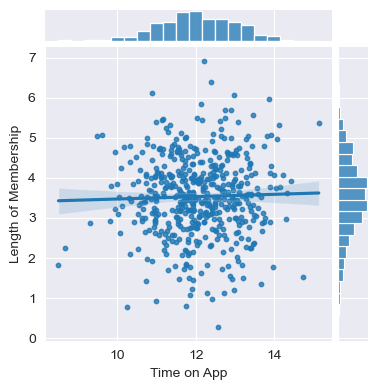

In [154]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = Ecom, kind = 'reg', height = 4, ratio = 8, scatter_kws = {'s': 10}, marginal_kws = {'kde': False})
plt.show()

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

In [155]:
print(Ecom.columns)

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


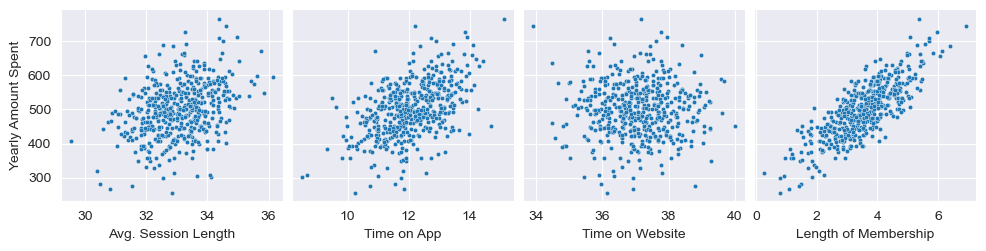

In [156]:
sns.pairplot(data= Ecom, x_vars = list(Ecom.columns[3:-1]), y_vars = 'Yearly Amount Spent', kind = 'scatter', plot_kws = {'s':10})
plt.show()

**Based on this we can see that Length of Membership has the highest correlation with the Yearly Amount Spent**

**Let's explore it individually**

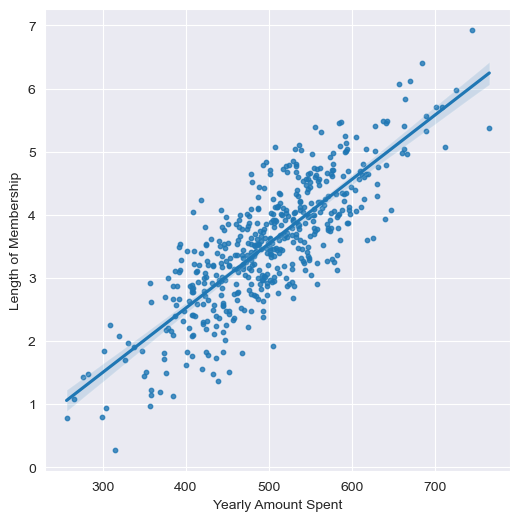

In [18]:
plt.figure(figsize= (6,6))
sns.regplot(x = 'Yearly Amount Spent', y = 'Length of Membership', data = Ecom, scatter_kws = {'s': 10})
plt.show()

**Just for a quantification let's have a quick glance at the correlation coefficients of these variables with **

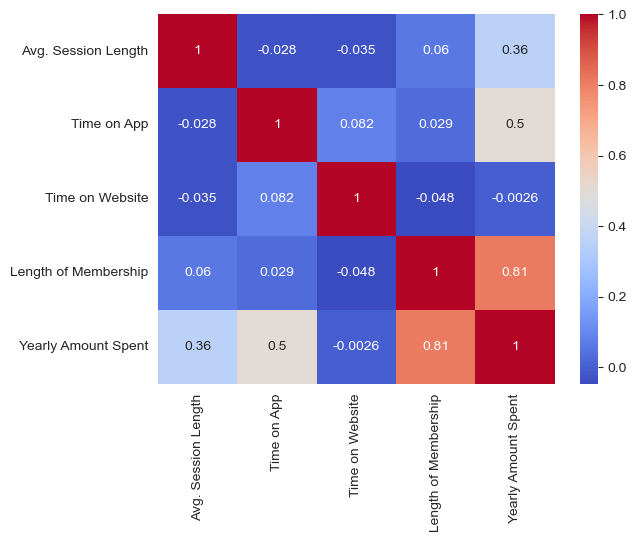

In [74]:
sns.heatmap(Ecom.corr(), cmap = 'coolwarm', annot= True)
plt.show()

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [157]:
print(Ecom.columns)

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


In [107]:
X = Ecom[['Avg. Session Length', 'Time on App', 'Length of Membership']]

In [108]:
y = Ecom['Yearly Amount Spent']

**Using train_test_split to split the data**

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 101)

## Training the Model

Now its time to train our model on our training data!

In [111]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [112]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [113]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [114]:
lm.coef_

array([25.98759055, 38.60941287, 61.2690456 ])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [115]:
prediction = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

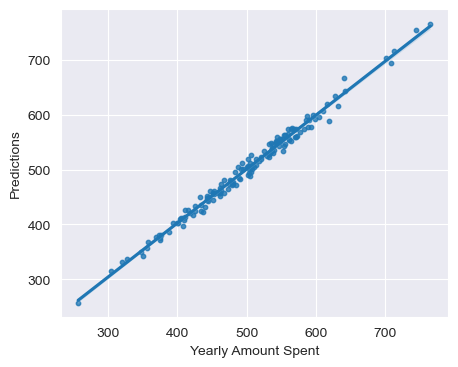

In [116]:
plt.figure(figsize= (5,4))
sns.regplot(x= y_test, y = prediction, scatter_kws = {'s' : 10})
plt.ylabel('Predictions')
plt.show()

In [117]:
print('Correlation between Labels and Predictions: ', np.corrcoef(y_test, prediction)[0,1])

Correlation between Labels and Predictions:  0.9945284464879884


## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).f

In [118]:
from sklearn import metrics

In [119]:
print('MAE: ', metrics.mean_absolute_error(y_test, prediction))
print('MSE: ', metrics.mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  7.236949056091383
MSE:  80.19544609397633
RMSE:  8.95519101381854


## Residuals

As we have gotten agreat fit for out model, now let's explore our model's predictions a little more.

**Let's see the distribution of the residuals of our linear regression model's predictions**

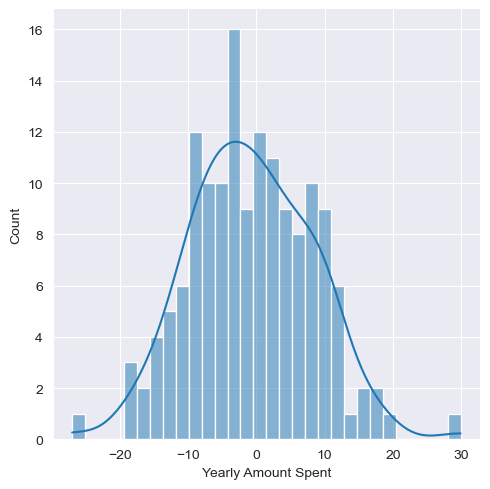

In [128]:
sns.displot((y_test-prediction), bins = 30, kde = True)
plt.show()

## Conclusion

Thus we can conclude that the Ecommerce platform should focus on incresing the **Length of Membership** of customers which in turns seems to be largely correlated to the **Avg. Session Length**. Hence these could be drivers to increase the engagement as well as Yearly Expenditure on the platform.

*Now let's just look at the coeffients and intercept of out Linear Regression Model*

In [136]:
cdf = pd.DataFrame(lm.coef_, index= X.columns, columns = ['Coefficient'])

In [158]:
intercepts = lm.intercept_

In [167]:
print('The Coefficients of our model are: \n', cdf, "\n \nAnd the Intercept is: ", intercepts)

The Coefficients of our model are: 
                       Coefficient
Avg. Session Length     25.987591
Time on App             38.609413
Length of Membership    61.269046 
 
And the Intercept is:  -1041.2679519308097


## End of Project